In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps

In [2]:
df = pd.read_csv('players_20.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [3]:
# show all column names

In [6]:
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [7]:
# number of rows
len(df)

18278

In [8]:
# number of cols
len(df.columns)

104

In [9]:
# number of rows and cols
df.shape

(18278, 104)

In [13]:
# number of players and their countries
output_df  = ps.sqldf("""
SELECT nationality, COUNT(*) FROM df GROUP BY nationality
""")
output_df

,nationality,COUNT(*)
0,Afghanistan,2
1,Albania,43
2,Algeria,50
3,Angola,16
4,Antigua & Barbuda,7
...,...,...
157,Venezuela,66
158,Vietnam,1
159,Wales,117
160,Zambia,10


In [25]:
# top 10 of players and their countries
output_df  = ps.sqldf("""
SELECT nationality, COUNT(*) as "Number_of_Players" FROM df GROUP BY nationality ORDER BY "Number_of_Players" DESC LIMIT 10
""")
output_df

,sofifa_id,nationality,Number_of_Players
0,202126,England,1667
1,192448,Germany,1216
2,193080,Spain,1035
3,231747,France,984
4,158023,Argentina,886
5,190871,Brazil,824
6,138956,Italy,732
7,198710,Colombia,591
8,181098,Japan,453
9,203376,Netherlands,416


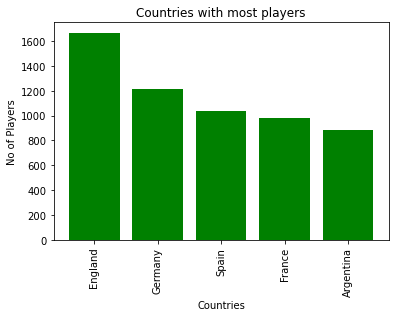

In [27]:
#bar plot of top 5 countries and their number of players
plot_df  = ps.sqldf("""
SELECT sofifa_id, nationality, COUNT(*) as "Number_of_Players" FROM df GROUP BY nationality ORDER BY "Number_of_Players" DESC LIMIT 5
""")
no_of_players = plot_df['Number_of_Players']
nationality_col = plot_df["nationality"]
plt.bar(nationality_col,no_of_players, color = 'green')
plt.xticks(rotation = 90)
plt.title("Countries with most players")
plt.xlabel("Countries")
plt.ylabel("No of Players")
plt.show()


In [18]:
#top 5 players short name and wages
output_df  = ps.sqldf("""
SELECT short_name, wage_eur FROM df LIMIT 5
""")
output_df

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [30]:
#top 5 players short name and wages with highest salary (wage)
output_df  = ps.sqldf("""
SELECT short_name, wage_eur FROM df ORDER BY wage_eur DESC LIMIT 5
""")
output_df

,short_name,wage_eur
0,L. Messi,565000
1,E. Hazard,470000
2,Cristiano Ronaldo,405000
3,K. De Bruyne,370000
4,A. Griezmann,370000


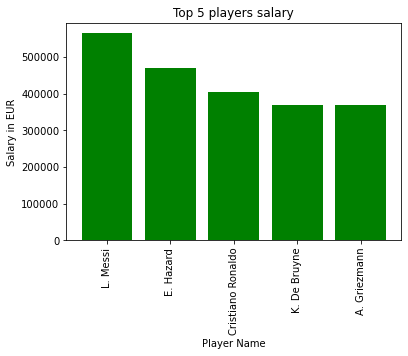

In [31]:
#bar plot point
output_df  = ps.sqldf("""
SELECT short_name, wage_eur FROM df ORDER BY wage_eur DESC LIMIT 5
""")
wage_row = output_df['wage_eur']
players_col = output_df["short_name"]
plt.bar(players_col,wage_row, color = 'green')
plt.xticks(rotation = 90)
plt.title("Top 5 players salary")
plt.xlabel("Player Name")
plt.ylabel("Salary in EUR")
plt.show()

In [32]:
#Top 10 records of Germany
output_df  = ps.sqldf("""
SELECT * FROM df WHERE nationality="Germany" LIMIT 10
""")
output_df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,None,None,None,None,None,None,None,None,None,None
1,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,None,None,None,None,None,None,None,None,None,None
2,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
3,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
4,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
5,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
6,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
7,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
8,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
9,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2


In [15]:
#Top 5 records of Germany plaayers with max height, weight and wages
output_df  = ps.sqldf("""
SELECT * FROM df WHERE nationality="Germany" ORDER BY height_cm DESC,weight_kg DESC,wage_eur DESC LIMIT 5
""")
output_df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,None,None,None,None,None,None,None,None,None,None
2,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,None,None,None,None,None,None,None,None,None,None
3,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,None,None,None,None,None,None,None,None,None,None
4,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,None,None,None,None,None,None,None,None,None,None


In [37]:
#short name and wage of top 5 Germany players
output_df  = ps.sqldf("""
SELECT short_name, wage_eur FROM df WHERE nationality="Germany" LIMIT 5
""")
output_df

,short_name,wage_eur
0,M. ter Stegen,250000
1,M. Neuer,155000
2,T. Kroos,330000
3,M. Reus,170000
4,M. Hummels,130000


In [38]:
#Top 5 players wti great shooting skills with short name
output_df  = ps.sqldf("""
SELECT * FROM df  ORDER BY shooting DESC LIMIT 5
""")
output_df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
2,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,...,65+3,66+3,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3
3,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,1988-06-02,173,70,Argentina,Manchester City,...,60+3,58+3,58+3,58+3,60+3,56+3,50+3,50+3,50+3,56+3
4,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,32,1987-01-24,182,86,Uruguay,FC Barcelona,...,67+5,67+5,67+5,67+5,67+5,64+5,63+5,63+5,63+5,64+5


In [39]:
#Top 5 players with great defending skills with (short name, defending, nationality, club)
output_df  = ps.sqldf("""
SELECT short_name,defending,nationality,club FROM df LIMIT 5
""")
output_df

,short_name,defending,nationality,club
0,V. van Dijk,90.0,Netherlands,Liverpool
1,G. Chiellini,90.0,Italy,Juventus
2,K. Koulibaly,89.0,Senegal,Napoli
3,D. Godín,89.0,Uruguay,Inter
4,M. Hummels,89.0,Germany,Borussia Dortmund


In [44]:
#wage record of top 5 players of Real Madrid team
output_df  = ps.sqldf("""
SELECT short_name,wage_eur FROM df WHERE club="Real Madrid" LIMIT 5
""")
output_df

,short_name,wage_eur
0,E. Hazard,470000
1,L. Modrić,340000
2,Sergio Ramos,300000
3,T. Courtois,235000
4,T. Kroos,330000


In [45]:
#shooting record of top 5 players of Real Madrid team
output_df  = ps.sqldf("""
SELECT short_name,shooting FROM df WHERE club="Real Madrid" LIMIT 5
""")
output_df

,short_name,shooting
0,E. Hazard,83.0
1,L. Modrić,76.0
2,Sergio Ramos,68.0
3,T. Courtois,NaN
4,T. Kroos,80.0


In [46]:
#Defending record of top 5 players of Real Madrid team
output_df  = ps.sqldf("""
SELECT short_name,defending FROM df WHERE club="Real Madrid" LIMIT 5
""")
output_df

,short_name,defending
0,E. Hazard,35.0
1,L. Modrić,72.0
2,Sergio Ramos,87.0
3,T. Courtois,NaN
4,T. Kroos,70.0


In [47]:
#Nationality record of top 5 players of Real Madrid team
output_df  = ps.sqldf("""
SELECT short_name,nationality FROM df WHERE club="Real Madrid" LIMIT 5
""")
output_df

,short_name,nationality
0,E. Hazard,Belgium
1,L. Modrić,Croatia
2,Sergio Ramos,Spain
3,T. Courtois,Belgium
4,T. Kroos,Germany


In [7]:
# Optional: get top 5 clubs with most number of players
output_df  = ps.sqldf("""
SELECT club ,COUNT(sofifa_id) as "Number of Players" FROM df GROUP BY club ORDER BY "Number of Players" DESC  LIMIT 5
""")
output_df

,club,Number of Players
0,Wolverhampton Wanderers,33
1,West Ham United,33
2,Watford,33
3,VfL Wolfsburg,33
4,Valencia CF,33


In [14]:
# Optional: get average number of players in a club
_df  = ps.sqldf("""
SELECT COUNT(sofifa_id) as "Number of Players" FROM df GROUP BY club ORDER BY "Number of Players" 
""")
output_df= ps.sqldf("""
SELECT AVG("Number of Players") FROM _df""")
output_df

,"AVG(""Number of Players"")"
0,26.186246


In [16]:
# Optional: get average number of players in a club using nested query
output_df  = ps.sqldf("""
SELECT AVG("Number of Players") FROM (SELECT COUNT(sofifa_id) as "Number of Players" FROM df GROUP BY club ORDER BY "Number of Players") 
""")

output_df

,"AVG(""Number of Players"")"
0,26.186246
